I have used four models in this project.

RandomForestClassifier   
LogisticRegression
DecisionTreeClassifier
Bayes Classifier
KNeighborsClassifier

# **Importing the libraries**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier # Accuracy 100%
from sklearn.ensemble import RandomForestClassifier # Accuracy 100%
from sklearn.linear_model import LogisticRegression # Accuracy 100%
from sklearn.neighbors import KNeighborsClassifier # Accuracy 62.38%
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
data = pd.read_csv('/content/Dataset Heart Disease.csv')
data.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [3]:
# Dimensions of the Dataset
data.shape

(1048, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


In [5]:
data.isnull().sum()

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# **1. Random Forest Classifier**

In [7]:
# Slicing data
X = data.drop(['oldpeak'], axis=1)
y = data['ST slope']

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print(f"Shape train features :{X_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{X_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(838, 12)
Shape train labels :(838,)
Shape test features :(210, 12)
Shape test labels :(210,)


In [9]:
# Instantiate the RandomForestClassifier model
rfc = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=50,max_depth=7)
rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

In [25]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

ST slope               0.668208
target                 0.130544
max heart rate         0.043511
Unnamed: 0             0.028994
chest pain type        0.028012
age                    0.024096
cholesterol            0.021160
resting bps            0.020680
exercise angina        0.019920
resting ecg            0.007642
fasting blood sugar    0.003965
sex                    0.003269
dtype: float64

In [10]:
#Let check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = rfc.predict(X_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = rfc.predict(X_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [11]:
print('Precision, Recall and f1-score : \n',classification_report(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00         5

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix : 
 [[  3   0   0   0]
 [  0 102   0   0]
 [  0   0 100   0]
 [  0   0   0   5]]


# **2 . Logistic Regression**

In [26]:
# Slicing data
X2 = data.drop(['fasting blood sugar'], axis=1)
y2 = data['sex']

In [27]:
print(y2.unique())

[1 0]


In [28]:
# Create a new target variable with 3 categories
y2_cat = pd.cut(y2, 3, labels=["Low", "Medium", "High"])

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_cat, test_size=0.2, random_state=42)

# Create a LogisticRegression model
logr = LogisticRegression()

# Fit the model to the training data
logr.fit(X2_train, y2_train)

LogisticRegression()

In [29]:
# Prediction result
y2_pred_test = logr.predict(X2_test)

In [30]:
print('Confusion Matrix \n', confusion_matrix(y2_test, y2_pred_test))
print('Classification Report \n',classification_report(y2_test, y2_pred_test))
print('Accuracy : ',accuracy_score(y2_test, y2_pred_test)*100,'%')

Confusion Matrix 
 [[162   0]
 [  0  48]]
Classification Report 
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       162
         Low       1.00      1.00      1.00        48

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Accuracy :  100.0 %


# **3. Decision Tree Classifier**

In [32]:
# Slicing data
# declare feature vector and target variable
x3 = data.drop(['fasting blood sugar'], axis=1)
y3 = data['sex']
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.2,random_state= 40)

In [33]:
# Instantiate the DecisionTreeClassifier model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42)
dtc.fit(x3_train,y3_train)
#Predict the response for test dataset
y3_pred = dtc.predict(x3_test)
# Predict the response for training dataset
y3_train_predict = dtc.predict(x3_train)
y3_test_predict = dtc.predict(x3_test)
dtc

DecisionTreeClassifier(max_depth=7, random_state=42)

In [35]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))

# Train accuracy
y_train_predict = dtc.predict(x3_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y3_train,y3_train_predict)*100))

# Test accuracy
y_test_predict = dtc.predict(x3_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y3_test,y3_test_predict)*100))

Accuracy: 1.0
Model accuracy for training data : 100.00%
Model accuracy for validation data : 100.00%


In [37]:
print('Precision, Recall and f1-score : \n',classification_report(y3_test,y3_pred))
print('Confusion Matrix : \n',confusion_matrix(y3_test,y3_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00       142

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix : 
 [[ 68   0]
 [  0 142]]


# **Visualizing alpha w.r.t impurity of leaves**

In [38]:
path = dtc.cost_complexity_pruning_path(x3_train, y3_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

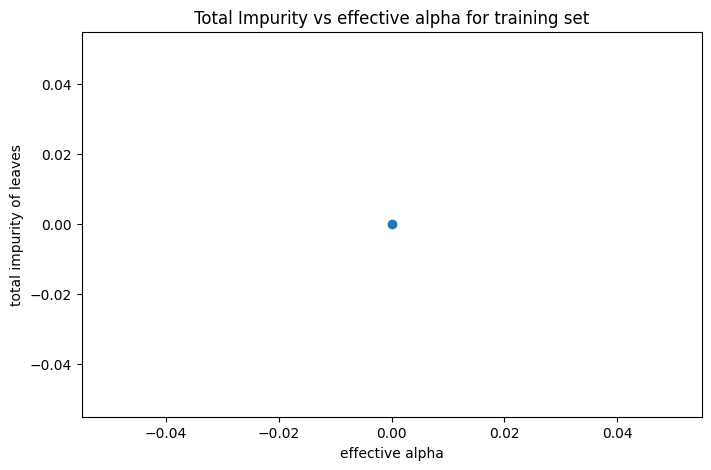

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [41]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42, ccp_alpha=ccp_alpha)
  clf.fit(x3_train, y3_train)
  clfs.append(clf)
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.3755959467079818
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3755959467079818


In [43]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42,ccp_alpha=0.016)
clf.fit(x3_train,y3_train)

DecisionTreeClassifier(ccp_alpha=0.016, max_depth=7, random_state=42)

In [44]:
pred=clf.predict(x3_test)
print('Accuracy of test dataset : ',accuracy_score(y3_test, pred))
pred_1 = clf.predict(x3_train)
print('Accuracy of train dataset : ',accuracy_score(y3_train,pred_1))

Accuracy of test dataset :  1.0
Accuracy of train dataset :  1.0


# **4. Bayes Classifier**

In [68]:
# Slicing data
X4 = data.drop(['fasting blood sugar'], axis=1)
y4 = data['sex']

In [69]:
#Split the data into training and test sets.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=7)

In [70]:
# Training the Naive Bayes model on the Training set
classifier = BernoulliNB()
classifier.fit(X4_train, y4_train)

BernoulliNB()

In [71]:
# Predicting the Test set results
y4_pred = classifier.predict(X4_test)
print("Predicted Test Results : \n",y4_pred)

Predicted Test Results : 
 [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1]


In [73]:
print('Precision, Recall and f1-score : \n',classification_report(y4_test,y4_pred))
print('Confusion Matrix : \n',confusion_matrix(y4_test,y4_pred))
print('Accuracy : ',accuracy_score(y4_test, y4_pred)*100,'%')

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00       233

    accuracy                           1.00       315
   macro avg       1.00      1.00      1.00       315
weighted avg       1.00      1.00      1.00       315

Confusion Matrix : 
 [[ 82   0]
 [  0 233]]
Accuracy :  100.0 %


# **5. K-Neighbour Classifier**

In [101]:
# Slicing data
X5 = data.drop(['fasting blood sugar','resting ecg'], axis=1)
y5 = data['sex']

In [130]:
# Split the dataset into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=20)

# Initialize the KNeighborsClassifier with the specified parameters
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski', n_jobs=-1, n_neighbors=1, p=2, weights='uniform')

# Fit the classifier to the training data
knn.fit(X5_train, y5_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=1)

In [131]:
pred5 = knn.predict(X5_test)
print(pred5)

[1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]


In [132]:
print('Confusion Matrix \n', confusion_matrix(y5_test,pred5))
print('Classification Report \n',classification_report(y5_test,pred5))
print('Accuracy : ',accuracy_score(y5_test, pred5)*100,'%')

Confusion Matrix 
 [[ 23  40]
 [ 39 108]]
Classification Report 
               precision    recall  f1-score   support

           0       0.37      0.37      0.37        63
           1       0.73      0.73      0.73       147

    accuracy                           0.62       210
   macro avg       0.55      0.55      0.55       210
weighted avg       0.62      0.62      0.62       210

Accuracy :  62.38095238095238 %


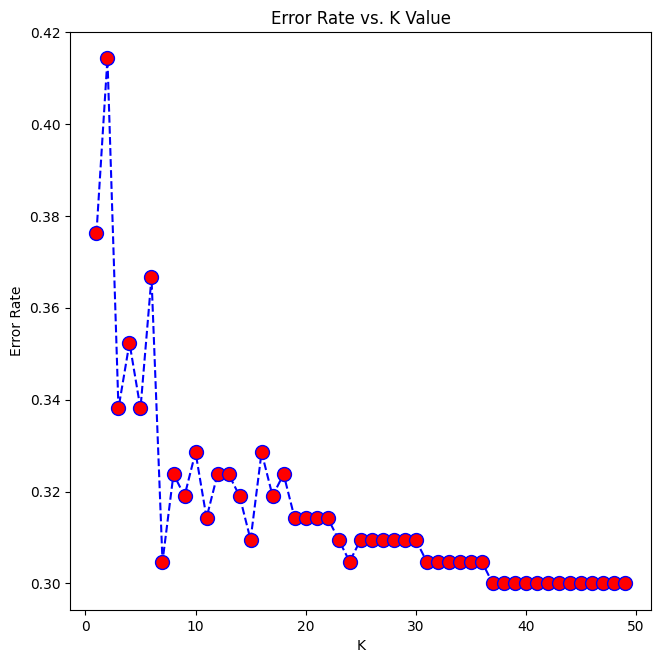

In [133]:
# Will take some time
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X5_train, y5_train)
    pred_i = knn.predict(X5_test)
    error_rate.append(np.mean(pred_i != y5_test))

# Plot the error rate vs. K value
plt.figure(figsize=(7.5,7.5))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [134]:
# NOW WITH K=1
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X5_train,y5_train)
pred = knn.predict(X5_test)
print('WITH K=40')
print('\n')
print(confusion_matrix(y5_test,pred5))
print('\n')
print(classification_report(y5_test,pred5))
print('Accuracy : ',accuracy_score(y5_test, pred5)*100,'%')

WITH K=40


[[ 23  40]
 [ 39 108]]


              precision    recall  f1-score   support

           0       0.37      0.37      0.37        63
           1       0.73      0.73      0.73       147

    accuracy                           0.62       210
   macro avg       0.55      0.55      0.55       210
weighted avg       0.62      0.62      0.62       210

Accuracy :  62.38095238095238 %
